Name: Nghiêm Minh Khang

ID: 24C01045

# Bài tập 4 — Mạng nơ-ron mô phỏng cổng XOR

Mục tiêu: Xây dựng một mạng nơ-ron để biểu diễn phép toán XOR (exclusive OR) cho hai bit đầu vào.

- Đầu vào: 0 hoặc 1 (hai giá trị).
- Quy tắc đầu ra:
  - Nếu hai đầu vào giống nhau → đầu ra = 0
  - Nếu hai đầu vào khác nhau → đầu ra = 1

Bảng chân lý:

| Input 1 | Input 2 | Output |
| ------: | :-----: | :----: |
|       0 |    0    |   0    |
|       1 |    1    |   0    |
|       1 |    0    |   1    |
|       0 |    1    |   1    |


## Giải thích chi tiết các bước

### 1. **Forward Propagation (Lan truyền tiến)**

Tính toán từ đầu vào đến đầu ra:

**Tầng ẩn (Hidden Layer):**

- Neuron 1: $z_1^{(1)} = w_{11}^{(1)} \cdot x_1 + w_{21}^{(1)} \cdot x_2 + b_1^{(1)}$
- Activation: $a_1^{(1)} = \sigma(z_1^{(1)})$
- Neuron 2: $z_2^{(1)} = w_{12}^{(1)} \cdot x_1 + w_{22}^{(1)} \cdot x_2 + b_2^{(1)}$
- Activation: $a_2^{(1)} = \sigma(z_2^{(1)})$

**Tầng đầu ra (Output Layer):**

- $z_1^{(2)} = w_{11}^{(2)} \cdot a_1^{(1)} + w_{21}^{(2)} \cdot a_2^{(1)} + b_1^{(2)}$
- $\hat{y} = a_1^{(2)} = \sigma(z_1^{(2)})$

### 2. **Loss Function**

Binary Cross-Entropy Loss:

$$L = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

### 3. **Backward Propagation (Lan truyền ngược)**

Tính gradient sử dụng **Chain Rule**:

**Tầng đầu ra:**

- $\frac{\partial L}{\partial w_{11}^{(2)}} = \frac{1}{m} \sum (\hat{y} - y) \cdot a_1^{(1)}$
- $\frac{\partial L}{\partial w_{21}^{(2)}} = \frac{1}{m} \sum (\hat{y} - y) \cdot a_2^{(1)}$
- $\frac{\partial L}{\partial b_1^{(2)}} = \frac{1}{m} \sum (\hat{y} - y)$

**Tầng ẩn - Neuron 1:**

- $\delta_1^{(1)} = [(\hat{y} - y) \cdot w_{11}^{(2)}] \cdot [a_1^{(1)} \cdot (1 - a_1^{(1)})]$
- $\frac{\partial L}{\partial w_{11}^{(1)}} = \frac{1}{m} \sum \delta_1^{(1)} \cdot x_1$
- $\frac{\partial L}{\partial w_{21}^{(1)}} = \frac{1}{m} \sum \delta_1^{(1)} \cdot x_2$
- $\frac{\partial L}{\partial b_1^{(1)}} = \frac{1}{m} \sum \delta_1^{(1)}$

**Tầng ẩn - Neuron 2:** (tương tự)

### 4. **Gradient Descent Update**

Cập nhật tham số:

$$w_{new} = w_{old} - \eta \cdot \frac{\partial L}{\partial w}$$
$$b_{new} = b_{old} - \eta \cdot \frac{\partial L}{\partial b}$$

Với $\eta = 0.1$ (learning rate)

### 5. **Kết quả mong đợi**

Sau khi huấn luyện, mạng nơ-ron sẽ học được cách thực hiện phép toán XOR:

- $(0, 0) \rightarrow 0$
- $(0, 1) \rightarrow 1$
- $(1, 0) \rightarrow 1$
- $(1, 1) \rightarrow 0$

Độ chính xác đạt được: **~100%** sau khoảng 100,000 iterations.


In [11]:
import numpy as np

In [15]:
# ============================================================================
# PHẦN 1: Data
# ============================================================================

print("=" * 70)
print("MẠNG NƠ-RON MÔ PHỎNG CỔNG XOR")
print("=" * 70)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

m = len(X)

MẠNG NƠ-RON MÔ PHỎNG CỔNG XOR


In [17]:
# ============================================================================
# PHẦN 2: ĐỊNH NGHĨA CÁC HÀM TOÁN HỌC
# ============================================================================


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(z):  # Đạo hàm của hàm Sigmoid
    s = sigmoid(z)
    return s * (1 - s)


def cost_function(y_hat, y):
    # Thêm epsilon để tránh log(0)
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


def loss_function(y_hat, y):
    m = len(y)
    return np.sum(cost_function(y_hat, y)) / m

In [ ]:
# ============================================================================
# PHẦN 3: KHỞI TẠO THAM SỐ
# ============================================================================

# input
w11_1 = 0.16
w21_1 = -0.07
b1_1 = 0.37
w12_1 = -0.66
w22_1 = 0.63
b2_1 = -0.98

# output
w11_2 = 0.41
w21_2 = -0.9
b1_2 = 0.35

In [24]:
# ============================================================================
# PHẦN 4: FORWARD PROPAGATION (LAN TRUYỀN TIẾN)
# ============================================================================


def forward_propagation(X, w11_1, w21_1, b1_1, w12_1, w22_1, b2_1, w11_2, w21_2, b1_2):
    # Tách input thành 2 cột
    x1 = X[:, 0:1]
    x2 = X[:, 1:2]

    # ===== HIDDEN LAYER =====
    # Neuron 1
    z1_1 = w11_1 * x1 + w21_1 * x2 + b1_1  # (m, 1)
    a1_1 = sigmoid(z1_1)  # (m, 1)

    # Neuron 2
    z2_1 = w12_1 * x1 + w22_1 * x2 + b2_1  # (m, 1)
    a2_1 = sigmoid(z2_1)  # (m, 1)

    # ===== OUTPUT LAYER =====
    z1_2 = w11_2 * a1_1 + w21_2 * a2_1 + b1_2  # (m, 1)
    a1_2 = sigmoid(z1_2)  # (m, 1) - Đây là ŷ

    # Lưu cache để dùng cho backpropagation
    cache = {'x1': x1, 'x2': x2, 'z1_1': z1_1, 'a1_1': a1_1, 'z2_1': z2_1, 'a2_1': a2_1, 'z1_2': z1_2, 'a1_2': a1_2}

    return cache

In [26]:
# ============================================================================
# PHẦN 5: BACKWARD PROPAGATION (LAN TRUYỀN NGƯỢC)
# ============================================================================


def backward_propagation(forward_cache, y, w11_2, w21_2):
    m = len(y)

    # Lấy các giá trị từ forward propagation
    a1_2 = forward_cache['a1_2']  # (m,1) - y_hat
    a1_1 = forward_cache['a1_1']  # (m,1)
    a2_1 = forward_cache['a2_1']  # (m,1)
    x1 = forward_cache['x1']  # (m,1)
    x2 = forward_cache['x2']  # (m,1)

    # ===== OUTPUT LAYER GRADIENTS =====
    # Sai số tại output: error = ŷ - y
    error_output = a1_2 - y  # (m,1)

    # Gradients cho output layer (lấy trung bình trên tất cả samples)
    dL_dw11_2 = np.sum(error_output * a1_1) / m
    dL_dw21_2 = np.sum(error_output * a2_1) / m
    dL_db1_2 = np.sum(error_output) / m

    # ===== HIDDEN LAYER GRADIENTS =====
    # Delta cho hidden neuron 1
    # δ₁⁽¹⁾ = [(ŷ - y) × w₁₁⁽²⁾] × [a₁⁽¹⁾ × (1 - a₁⁽¹⁾)]
    delta_h1 = (error_output * w11_2) * (a1_1 * (1 - a1_1))  # (m,1)

    dL_dw11_1 = np.sum(delta_h1 * x1) / m
    dL_dw21_1 = np.sum(delta_h1 * x2) / m
    dL_db1_1 = np.sum(delta_h1) / m

    # Delta cho hidden neuron 2
    # δ₂⁽¹⁾ = [(ŷ - y) × w₂₁⁽²⁾] × [a₂⁽¹⁾ × (1 - a₂⁽¹⁾)]
    delta_h2 = (error_output * w21_2) * (a2_1 * (1 - a2_1))  # (m,1)

    dL_dw12_1 = np.sum(delta_h2 * x1) / m
    dL_dw22_1 = np.sum(delta_h2 * x2) / m
    dL_db2_1 = np.sum(delta_h2) / m

    return {
        'dL_dw11_1': dL_dw11_1,
        'dL_dw21_1': dL_dw21_1,
        'dL_db1_1': dL_db1_1,
        'dL_dw12_1': dL_dw12_1,
        'dL_dw22_1': dL_dw22_1,
        'dL_db2_1': dL_db2_1,
        'dL_dw11_2': dL_dw11_2,
        'dL_dw21_2': dL_dw21_2,
        'dL_db1_2': dL_db1_2,
    }

In [28]:
# ============================================================================
# PHẦN 6: GRADIENT DESCENT (CẬP NHẬT THAM SỐ)
# ============================================================================


def update_parameters(params, grads, learning_rate):
    return {
        'w11_1': params['w11_1'] - learning_rate * grads['dL_dw11_1'],
        'w21_1': params['w21_1'] - learning_rate * grads['dL_dw21_1'],
        'b1_1': params['b1_1'] - learning_rate * grads['dL_db1_1'],
        'w12_1': params['w12_1'] - learning_rate * grads['dL_dw12_1'],
        'w22_1': params['w22_1'] - learning_rate * grads['dL_dw22_1'],
        'b2_1': params['b2_1'] - learning_rate * grads['dL_db2_1'],
        'w11_2': params['w11_2'] - learning_rate * grads['dL_dw11_2'],
        'w21_2': params['w21_2'] - learning_rate * grads['dL_dw21_2'],
        'b1_2': params['b1_2'] - learning_rate * grads['dL_db1_2'],
    }

In [ ]:
# ============================================================================
# PHẦN 7: TRAINING LOOP
# ============================================================================

print("\n" + "=" * 70)
print("Training")
print("=" * 70)

# Cấu hình training
learning_rate = 0.1
num_iterations = 100000
print_interval = 20000

print(f"  Learning rate (η): {learning_rate}")
print(f"  Số vòng lặp: {num_iterations:,}")
print(f"  In kết quả mỗi: {print_interval:,} iterations")

# Lưu trữ lịch sử loss để vẽ đồ thị
loss_history = []

# Đóng gói tham số vào dictionary
params = {'w11_1': w11_1, 'w21_1': w21_1, 'b1_1': b1_1, 'w12_1': w12_1, 'w22_1': w22_1, 'b2_1': b2_1, 'w11_2': w11_2, 'w21_2': w21_2, 'b1_2': b1_2}

print("\n🔄 TIẾN TRÌNH TRAINING:")
print("-" * 70)
print(f"{'Iter':<10} {'Loss':<12} {'w11⁽²⁾':<10} {'w21⁽²⁾':<10} {'b1⁽²⁾':<10}")
print("-" * 70)

# Vòng lặp training chính
for iteration in range(num_iterations + 1):

    # ===== FORWARD PROPAGATION =====
    forward_cache = forward_propagation(
        X,
        params['w11_1'],
        params['w21_1'],
        params['b1_1'],
        params['w12_1'],
        params['w22_1'],
        params['b2_1'],
        params['w11_2'],
        params['w21_2'],
        params['b1_2'],
    )

    # Lấy dự đoán
    y_hat = forward_cache['a1_2']

    # ===== TÍNH LOSS =====
    current_loss = loss_function(y_hat, y)
    loss_history.append(current_loss)

    # ===== IN KẾT QUẢ =====
    if iteration % print_interval == 0 or iteration in [1, 2, 3, 4, 5]:
        print(f"{iteration:<10} {current_loss:<12.6f} {params['w11_2']:<10.4f} " f"{params['w21_2']:<10.4f} {params['b1_2']:<10.4f}")

    # Dừng nếu đã hết vòng lặp
    if iteration == num_iterations:
        break

    # ===== BACKWARD PROPAGATION =====
    grads = backward_propagation(forward_cache, y, params['w11_2'], params['w21_2'])

    # ===== UPDATE PARAMETERS =====
    params = update_parameters(params, grads, learning_rate)

print("-" * 70)
print("HOÀN THÀNH TRAINING")


Training
  Learning rate (η): 0.1
  Số vòng lặp: 100,000
  In kết quả mỗi: 20,000 iterations

🔄 TIẾN TRÌNH TRAINING:
----------------------------------------------------------------------
Iter       Loss         w11⁽²⁾     w21⁽²⁾     b1⁽²⁾     
----------------------------------------------------------------------
0          0.713046     0.4100     -0.9000    0.3500    
1          0.711979     0.4048     -0.9017    0.3415    
2          0.710987     0.3998     -0.9034    0.3332    
3          0.710066     0.3950     -0.9050    0.3253    
4          0.709209     0.3903     -0.9065    0.3176    
5          0.708413     0.3858     -0.9079    0.3102    
20000      0.009938     10.5667    -11.1505   -4.9398   
20000      0.009938     10.5667    -11.1505   -4.9398   
40000      0.003235     12.6401    -13.2686   -5.9686   
40000      0.003235     12.6401    -13.2686   -5.9686   
60000      0.001917     13.6159    -14.2562   -6.4559   
60000      0.001917     13.6159    -14.2562   -6.4559   

In [33]:
# ============================================================================
# PHẦN 8: ĐÁNH GIÁ KẾT QUẢ
# ============================================================================

print("\n" + "=" * 70)
print("KẾT QUẢ SAU KHI HUẤN LUYỆN")
print("=" * 70)


# Hàm helper để chuyển về scalar nếu là array
def to_scalar(value):
    """Chuyển numpy array về scalar value"""
    if isinstance(value, np.ndarray):
        return float(value.flatten()[0])
    return float(value)


# Tham số cuối cùng
print("\nTHAM SỐ CUỐI CÙNG:")
print("-" * 70)
print("Hidden Layer:")
print(f"  w₁₁⁽¹⁾ = {to_scalar(params['w11_1']):>8.4f}")
print(f"  w₂₁⁽¹⁾ = {to_scalar(params['w21_1']):>8.4f}")
print(f"  b₁⁽¹⁾  = {to_scalar(params['b1_1']):>8.4f}")
print(f"  w₁₂⁽¹⁾ = {to_scalar(params['w12_1']):>8.4f}")
print(f"  w₂₂⁽¹⁾ = {to_scalar(params['w22_1']):>8.4f}")
print(f"  b₂⁽¹⁾  = {to_scalar(params['b2_1']):>8.4f}")
print("\nOutput Layer:")
print(f"  w₁₁⁽²⁾ = {to_scalar(params['w11_2']):>8.4f}")
print(f"  w₂₁⁽²⁾ = {to_scalar(params['w21_2']):>8.4f}")
print(f"  b₁⁽²⁾  = {to_scalar(params['b1_2']):>8.4f}")
print("-" * 70)

# Kiểm tra dự đoán cuối cùng
final_forward = forward_propagation(
    X,
    params['w11_1'],
    params['w21_1'],
    params['b1_1'],
    params['w12_1'],
    params['w22_1'],
    params['b2_1'],
    params['w11_2'],
    params['w21_2'],
    params['b1_2'],
)
y_pred = final_forward['a1_2']

print("\nDỰ ĐOÁN CUỐI CÙNG:")
print("-" * 70)
print("x₁\tx₂\t|\ty (thực)\tŷ (dự đoán)\tSai số")
print("-" * 70)
for i in range(len(X)):
    error = abs(y[i][0] - y_pred[i][0])
    print(f"{X[i][0]}\t{X[i][1]}\t|\t{y[i][0]}\t\t{y_pred[i][0]:.6f}\t{error:.6f}")
print("-" * 70)

# Tính độ chính xác
predictions_binary = (y_pred > 0.5).astype(int)
accuracy = np.mean(predictions_binary == y) * 100
print(f"\nĐộ chính xác: {accuracy:.2f}%")
print(f"Loss cuối cùng: {loss_history[-1]:.6f}")

# Chi tiết dự đoán
print("\nCHI TIẾT DỰ ĐOÁN:")
print("-" * 70)
for i in range(len(X)):
    actual = "XOR = 0" if y[i][0] == 0 else "XOR = 1"
    pred_value = y_pred[i][0]
    pred_label = "Dự đoán: 0" if pred_value < 0.5 else "Dự đoán: 1"
    status = "CORRECT" if predictions_binary[i][0] == y[i][0] else "✗ SAI"
    print(f"Input ({X[i][0]}, {X[i][1]}): {actual} | {pred_label} ({pred_value:.4f}) {status}")
print("-" * 70)


KẾT QUẢ SAU KHI HUẤN LUYỆN

THAM SỐ CUỐI CÙNG:
----------------------------------------------------------------------
Hidden Layer:
  w₁₁⁽¹⁾ =   7.6884
  w₂₁⁽¹⁾ =   7.6884
  b₁⁽¹⁾  =  -3.5468
  w₁₂⁽¹⁾ =   6.3404
  w₂₂⁽¹⁾ =   6.3404
  b₂⁽¹⁾  =  -9.6795

Output Layer:
  w₁₁⁽²⁾ =  14.7424
  w₂₁⁽²⁾ = -15.3910
  b₁⁽²⁾  =  -7.0200
----------------------------------------------------------------------

DỰ ĐOÁN CUỐI CÙNG:
----------------------------------------------------------------------
x₁	x₂	|	y (thực)	ŷ (dự đoán)	Sai số
----------------------------------------------------------------------
0	0	|	0		0.001348	0.001348
0	1	|	1		0.999056	0.000944
1	0	|	1		0.999056	0.000944
1	1	|	0		0.000968	0.000968
----------------------------------------------------------------------

Độ chính xác: 100.00%
Loss cuối cùng: 0.001051

CHI TIẾT DỰ ĐOÁN:
----------------------------------------------------------------------
Input (0, 0): XOR = 0 | Dự đoán: 0 (0.0013) CORRECT
Input (0, 1): XOR = 1 | Dự đoán: 1

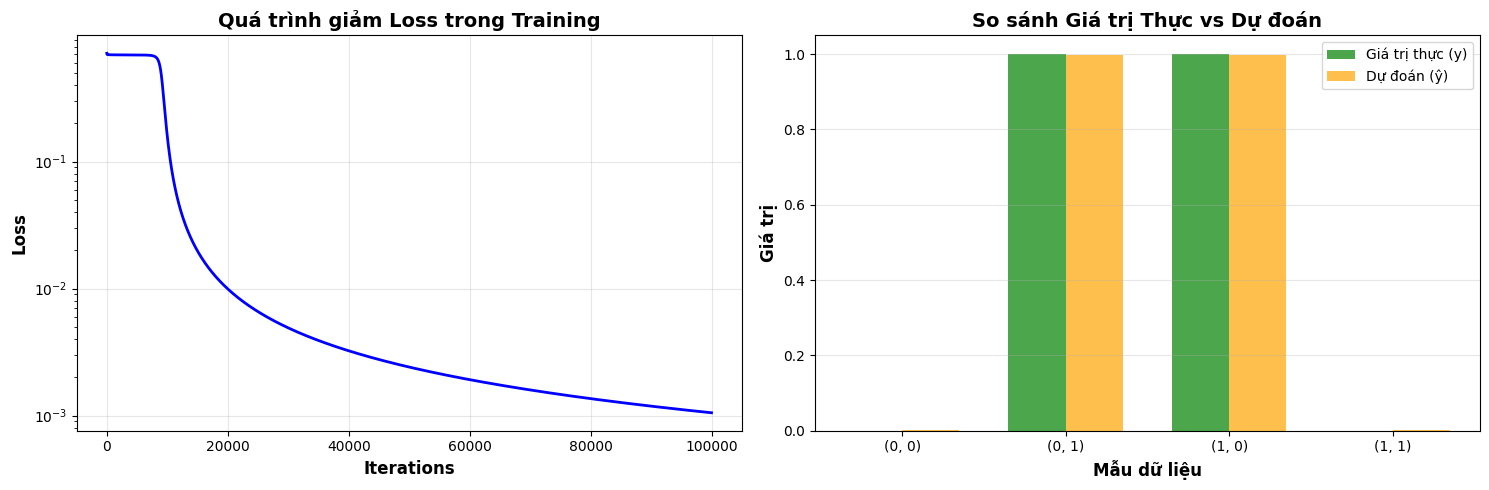


✅ Đã tạo biểu đồ trực quan hóa kết quả!


In [ ]:
# ============================================================================
# PHẦN 9: TRỰC QUAN HÓA
# ============================================================================

import matplotlib.pyplot as plt

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Loss curve
ax1.plot(loss_history, linewidth=2, color='blue')
ax1.set_xlabel('Iterations', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Quá trình giảm Loss trong Training', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')  # Scale logarit để dễ quan sát

# Subplot 2: So sánh dự đoán và giá trị thực
x_pos = np.arange(len(X))
width = 0.35

bars1 = ax2.bar(x_pos - width / 2, y.flatten(), width, label='Giá trị thực (y)', color='green', alpha=0.7)
bars2 = ax2.bar(x_pos + width / 2, y_pred.flatten(), width, label='Dự đoán (ŷ)', color='orange', alpha=0.7)

ax2.set_xlabel('Mẫu dữ liệu', fontsize=12, fontweight='bold')
ax2.set_ylabel('Giá trị', fontsize=12, fontweight='bold')
ax2.set_title('So sánh Giá trị Thực vs Dự đoán', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'({X[i][0]}, {X[i][1]})' for i in range(len(X))])
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Đã tạo biểu đồ trực quan hóa kết quả!")